## Importing the Libraries and Packages

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats

#To plot the graph embedded in the notebook
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

## Load the data

In [73]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [74]:
#checking the shape of data
df.shape

(1338, 7)

In [75]:
# basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


###### Different types of variable in the dataset are:
###### Categorical variables - sex, smoker, and region
###### Quantitative variables -age, bmi, children, and charges. Here age and children are discrete variables where as bmi, and charges are continous variables.

## Data Cleaning

In [76]:
#checking for missing values or Nan in every column
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###### There are no null or missing values in the dataset. 

In [77]:
#checking datatypes of column
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [78]:
#checking unique values of the features
print ("\nUnique values :  \n", df.nunique())


Unique values :  
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


## Descriptive Statistics

In [79]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


###### df.describe() provides the descriptive statistics of all the numerical values of the dataset.
###### * The average age of the primary beneficiary is 39.2 and maximum age is 64.
###### * The average BMI is 30.66, that is out of normal BMI range, Maximum BMI is 53.13
###### * The average medical costs billed to health insurance is 13270, median is 9382 and maximum is 63770
###### * The median is less than mean in charges , indicating the distrubution is positively skewed .
###### * The customer on an average has 1 child.
###### * For age, bmi, and children , the mean is almost equal to the median, suggesting that the data is normally distrubuted.

In [80]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [81]:
# get counts of unique observations for each categorical variable
list_col=  df.select_dtypes(['object']).columns
for i in range(len(list_col)):
    print(df[list_col[i]].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


**Observations**

###### 676 male and 662 female, indicates that the dataset has slightly more males than females.
###### 1064 nonsomker and 274 smoker, indicating samples has more non-smokers.
###### Number of claims from the customer who reside in southeast region is comparitively more than other regions.

----
## Exploratory Data Analysis

## Univariate Analysis (Central Tendency, Dispersion)

In [82]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

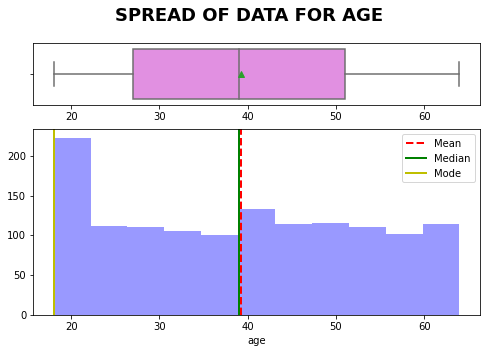

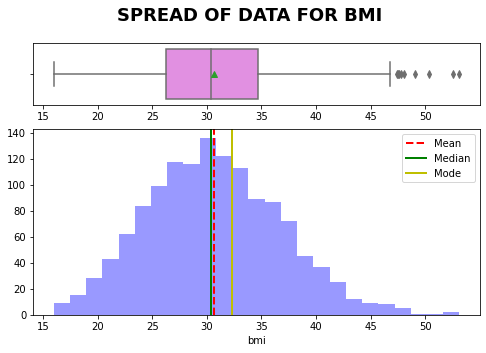

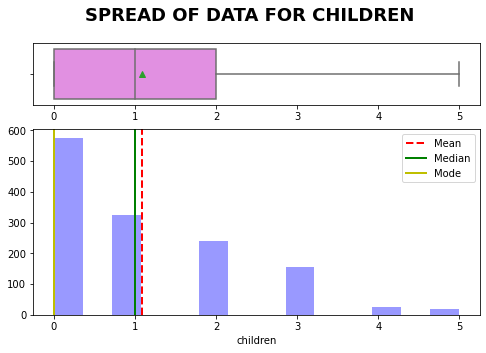

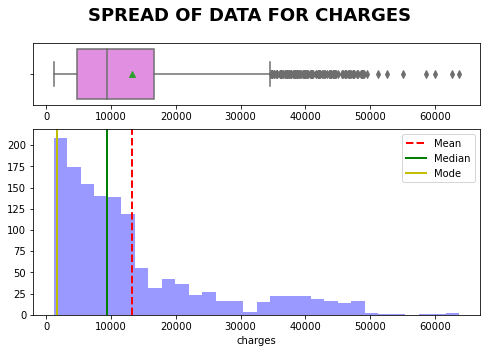

In [83]:
#select all quantitative columns for checking the spread
list_col=  df.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

**Observations**

###### Age of primary beneficiary lies approximately between 18 - 65 . Average age is around 40. Majority of customers are in the range of 18- 23.
###### Bmi is normally distributed and Average bmi of beneficiary is 30. This bmi is outside the normal range of BMI. There are lot of outliers at upper end
###### Most of the beneficiary have no children.
###### Charges distribution is unimodal and is right skewed. Average cost incurred to the insurance is around 130000 and highest charge is 63770. There are lot of outliers at upper end.

## Count Plot

In [84]:
# Function to create barplots that indicate percentage for each category.
def bar_plot(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage

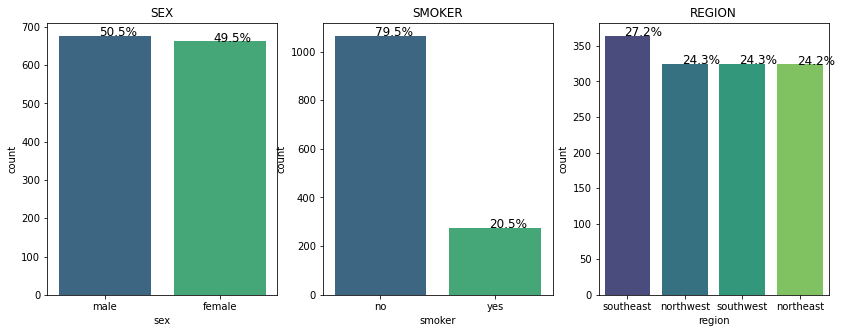

In [85]:
#get all category datatype 
list_col=  df.select_dtypes(['object']).columns
fig1, axes1 =plt.subplots(1,3,figsize=(14, 5))
for i in range(len(list_col)):
    order = df[list_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.countplot(x=list_col[i], data=df , order=order,ax=axes1[i],palette='viridis').set(title=list_col[i].upper())
    bar_plot(axes1[i],df[list_col[i]])

**Observations**

###### 50.5% of beneficiaries are male and 49.5 % are female. Approximately same number of male and female beneficiary.
###### 20.5% of beneficiaries are smokers.
###### Beneficiaries are evenly distributed across the regions with South East being the highest one (~27%) with the rest of regions each containing around ~24%.

## Correlation Matrix

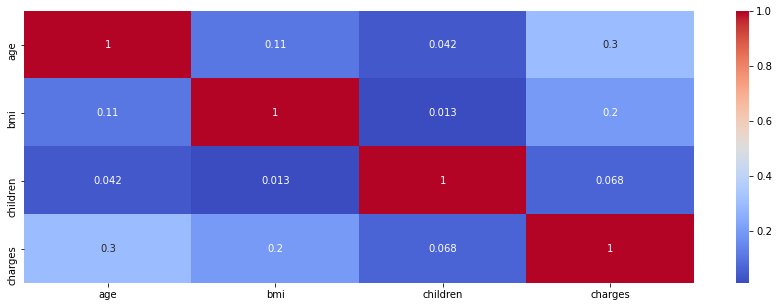

In [86]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True ,cmap="coolwarm" )
plt.show()

###### * There is little correlation between 'charges and age' and 'charges and bmi'.
###### * There is very little correlation between  charges and children.


## Box Plot

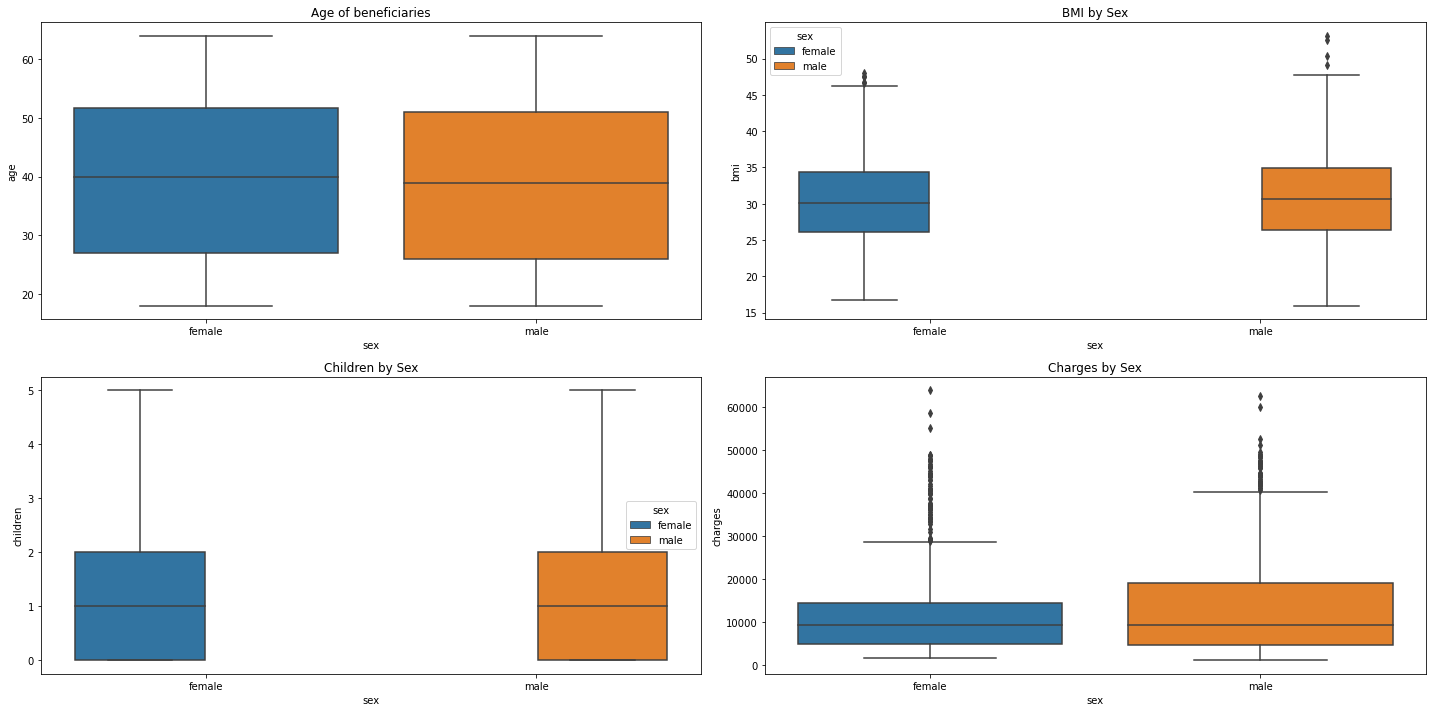

In [87]:
fig, axx = plt.subplots(2, 2, figsize=(20,10))
axx[0][0].set_title('Age of beneficiaries')
sns.boxplot(x='sex', y='age', data=df, ax=axx[0][0])
axx[0][1].set_title('BMI by Sex')
sns.boxplot(x='sex', y='bmi', hue='sex', data=df, ax=axx[0][1])
axx[1][0].set_title('Children by Sex')
sns.boxplot(x='sex', y='children', hue='sex', data=df, ax=axx[1][0])
axx[1][1].set_title('Charges by Sex')
sns.boxplot(x='sex', y='charges', data=df, ax=axx[1][1])
plt.tight_layout()

###### From the above box plot, we can deduce that
###### * Avergae Age of female beneficiary is slightly higher than male beneficiary.
###### * BMI of male policy holder has many outliers compared to that of female and average BMI of male is slightly higher than female.
##### * Both male and female beneficiary have equal number of children.
###### * Male policy holder are charged more to insurance compared to female policy holder. There are lot of outliers for female policy holder.

## Histogram Plot

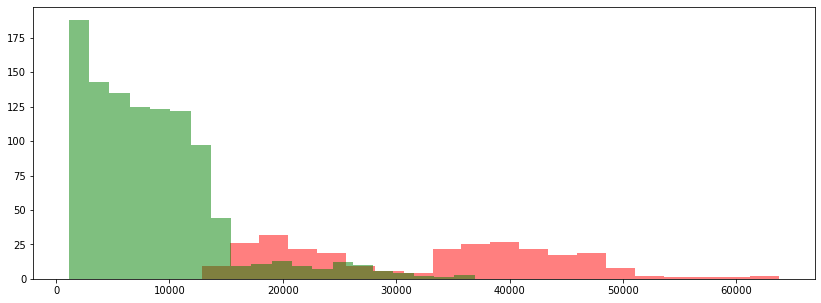

In [88]:
plt.figure(figsize=(14,5))
plt.hist(df[(df.smoker == 'yes')]["charges"], bins=20, alpha=0.5, color='red')
plt.hist(df[(df.smoker == 'no')]["charges"], bins=20, alpha=0.5, color='green')
plt.show()

###### We can clearly see that the policy holders who smoke spend more on insurance. But it looks like the number of non-smokersare greater than who smoke.

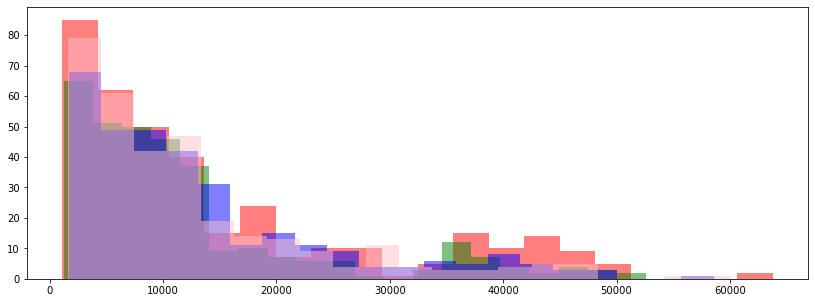

In [89]:
plt.figure(figsize=(14,5))
plt.hist(df[(df.region == 'southeast')]["charges"], bins=20, alpha=0.5, color='red')
plt.hist(df[(df.region == 'southwest')]["charges"], bins=20, alpha=0.5, color='green')
plt.hist(df[(df.region == 'northeast')]["charges"], bins=20, alpha=0.5, color='blue')
plt.hist(df[(df.region == 'northwest')]["charges"], bins=20, alpha=0.5, color='pink')
plt.show()

## Count Plot

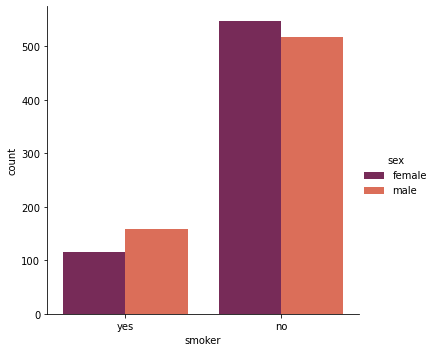

In [90]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rocket", data=df)
plt.show()

###### There are significantly more non-smokers than smokers and we could see that there are more male smokers.

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <a list of 10 Patch objects>)

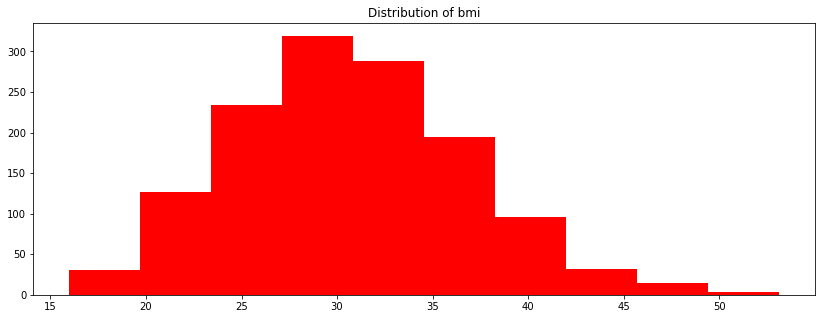

In [91]:
plt.figure(figsize=(14,5))
plt.title("Distribution of bmi")
plt.hist([df['bmi']] ,color = 'r')

###### The bmi has a normal distribution.

## Scatter Plot

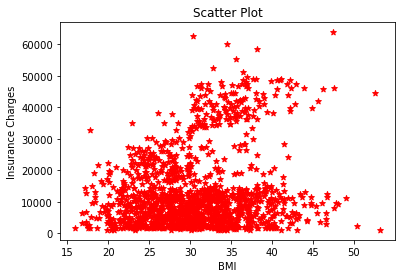

In [92]:
plt.scatter(df['bmi'],df['charges'],marker = '*', c ='r')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.title('Scatter Plot')
plt.show()

###### There is a positive relationship between BMI and insurance charges, meaning people with higher BMI scores have higher medical bills. 
###### Eventhough the BMI follows a normal distribution,  it seems there is no obvious relationship between bmi and insurance charges. There are possibly two groups to the scatter plot, judging by the spread of points above and below the regression line.

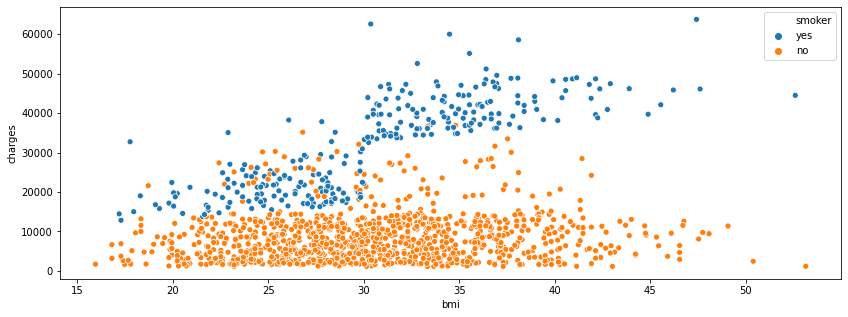

In [93]:
# we can outline the smokers in the above scatter plot
plt.figure(figsize=(14,5))
ax = sns.scatterplot(x='bmi',y='charges',data=df, hue='smoker')
plt.show()

###### Now we see that the smoking has  biggest effect on the insurance charges. 
###### Smoker have more costlier claims than nonsmoker.

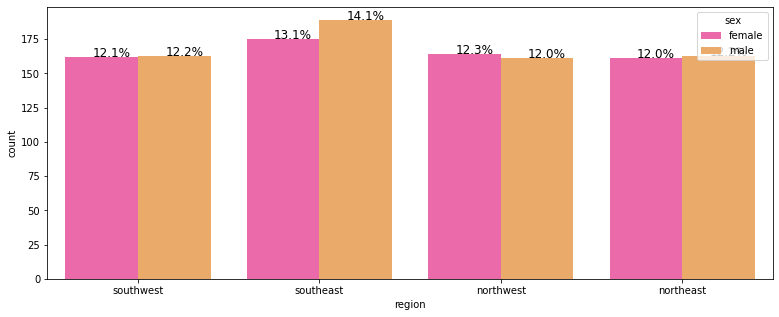

In [94]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='sex',data=df,palette='spring')
bar_plot(ax,df['sex'])

###### All the regions have equal number of male and female beneficiaries while southeast has more male beneficiaries,

In [95]:
category1=pd.cut(df.age,bins=[18,28,38,48,58,68],labels=['18-28','28-38','38-48','48-58','58-68'])
df.insert(6,'AgeBin',category1)

In [96]:
df.groupby(df.AgeBin).charges.mean()

AgeBin
18-28     9528.142786
28-38    11598.554943
38-48    14334.585843
48-58    15887.954341
58-68    20824.972901
Name: charges, dtype: float64

###### The insurance charges increase as the age of the primary beneficiary increases.

## Pivot Table

In [97]:
df.pivot_table('charges', index='sex', columns='children')

children,0,1,2,3,4,5
sex,,,,,,
female,11905.714276,12161.360414,13941.317326,13865.605066,13937.674562,9854.006419
male,12832.696736,13273.522458,16187.095325,16789.167419,13782.284829,7931.658310


######  Beneficiary with 2 or 3 dependent have billed higher compared to others people who have 5.This is unusual and may be because of uneven number of observations in each group. 

## Data Preprocessing

In [98]:
# Checking the unique values for 'sex'
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [99]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

### Label Encoder

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [101]:
df['sex']= le.fit_transform(df['sex'])
df['smoker']= le.fit_transform(df['smoker'])

###### The categorical data in columns 'sex' , and 'smoker' has been converted to numerical data using Label encoder.

In [102]:
print("The unique values of column 'sex' are: ",df['sex'].unique())
print("The unique values of column 'smoker' are: ",df['smoker'].unique())

The unique values of column 'sex' are:  [0 1]
The unique values of column 'smoker' are:  [1 0]


-----
## Preparing the data for training the model

In [103]:
X = df.drop(['charges','AgeBin', 'region'],axis=1)
Y = df['charges']
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Splitting the data into Training set and Testing set

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)
print("Shape of x_train is: ",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is: ",y_train.shape)
print("Shape of y_test is: ",y_test.shape)
x_train.columns

Shape of x_train is:  (936, 5)
Shape of x_test is:  (402, 5)
Shape of y_train is:  (936,)
Shape of y_test is:  (402,)


Index(['age', 'sex', 'bmi', 'children', 'smoker'], dtype='object')

## Building Linear Regression Model

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [106]:
# Predicting values
y_train_predict = lin_model.predict(x_train)
y_test_predict = lin_model.predict(x_test)

In [107]:
train_acc_linear = lin_model.score(x_train, y_train_predict)
test_acc_linear = lin_model.score(x_test, y_test_predict)
print('Training accuracy: {}'.format(train_acc_linear))
print('Testing accuracy: {}'.format(test_acc_linear))

Training accuracy: 1.0
Testing accuracy: 1.0


**Linear Regression Model Evaluation**

In [108]:
# mean absolute error
mae = mean_absolute_error(y_test, y_test_predict)
print("The mean absolute error is : %.2f" % mae)
# mean squared error
mse = mean_squared_error(y_test, y_test_predict)
print("The mean squared error is : %.2f" % mse)
rmse = (np.sqrt(mse))
# root mean square error
print("The root mean squared error is : %.2f" % rmse)
r2_linear = r2_score(y_test, y_test_predict)
print("The Variance score is : %.2f" % r2_linear)

The mean absolute error is : 4124.96
The mean squared error is : 37000903.49
The root mean squared error is : 6082.84
The Variance score is : 0.74


In [109]:
print("The coeffiecients of the Linear Regression model are: ", lin_model.coef_)
print("The intercept of the Linear Regression model is: ", lin_model.intercept_)

The coeffiecients of the Linear Regression model are:  [  252.33666642  -265.73101397   306.88025581   344.3662645
 24050.20408698]
The intercept of the Linear Regression model is:  -11138.939302606848


## Building Ridge Regression Model with alpha(learning rate) = 0.06

In [110]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.06)
ridge.fit(x_train, y_train)

Ridge(alpha=0.06)

In [111]:
# Predicting values
y_train_pred_ridge = ridge.predict(x_train)
y_test_pred_ridge = ridge.predict(x_test)

In [112]:
train_acc_ridge = ridge.score(x_train, y_train_pred_ridge)
test_acc_ridge = ridge.score(x_test, y_test_pred_ridge)
print('Training accuracy: {}'.format(train_acc_ridge))
print('Testing accuracy: {}'.format(test_acc_ridge))

Training accuracy: 1.0
Testing accuracy: 1.0


## Ridge Regression Model Evaluation

In [113]:
# mean absolute error
mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
print("The mean absolute error is : %.2f" % mae_ridge)
# mean squared error
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
print("The mean squared error is : %.2f" % mse_ridge)
rmse_ridge = (np.sqrt(mse_ridge))
# root mean square error
print("The root mean squared error is : %.2f" % rmse_ridge)
r2_ridge = r2_score(y_test, y_test_pred_ridge)
print("The Variance score is : %.2f" % r2_ridge)

The mean absolute error is : 4125.63
The mean squared error is : 36998649.36
The root mean squared error is : 6082.65
The Variance score is : 0.74


In [114]:
print("The coeffiecients of the Ridge model are: ", ridge.coef_)
print("The intercept of the Ridge model is: ", ridge.intercept_)

The coeffiecients of the Ridge model are:  [  252.33380765  -265.16884258   306.88488449   344.32690554
 24040.74156042]
The intercept of the Ridge model is:  -11137.26340736697


## Building Lasso Regression Model with alpha(learning rate) = 0.001

In [115]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001)
lasso.fit(x_train, y_train)

Lasso(alpha=0.001)

In [116]:
y_pred_lasso = lasso.predict(x_test)

In [117]:
# Predicting values
y_train_pred_lasso = lasso.predict(x_train)
y_test_pred_lasso = lasso.predict(x_test)

In [118]:
train_acc_lasso = lasso.score(x_train, y_train_pred_lasso)
test_acc_lasso = lasso.score(x_test, y_test_pred_lasso)
print('Training accuracy: {}'.format(train_acc_lasso))
print('Testing accuracy: {}'.format(test_acc_lasso))

Training accuracy: 1.0
Testing accuracy: 1.0


**Lasso Regression Model Evaluation**

In [119]:
# mean absolute error
mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
print("The mean absolute error is : %.2f" % mae_lasso)
# mean squared error
mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
print("The mean squared error is : %.2f" % mse_lasso)
rmse_lasso = (np.sqrt(mse_lasso))
# root mean square error
print("The root mean squared error is : %.2f" % rmse_lasso)
r2_lasso = r2_score(y_test, y_test_pred_lasso)
print("The Variance score is : %.2f" % r2_lasso)

The mean absolute error is : 4124.96
The mean squared error is : 37000902.13
The root mean squared error is : 6082.84
The Variance score is : 0.74


In [120]:
print("The coeffiecients of the Lasso model are: ", lasso.coef_)
print("The intercept of the Lasso model is: ", lasso.intercept_)

The coeffiecients of the Lasso model are:  [  252.336662    -265.72662457   306.88021702   344.36555189
 24050.19761677]
The intercept of the Lasso model is:  -11138.938065445976


In [121]:
lasso.score(x_test, y_test)

0.7389093226194634

## Comparing the models

In [122]:
models = [('Linear Regression',mae,mse, rmse,r2_linear),
          ('Ridge Regression',mae_ridge,mse_ridge, rmse_ridge,r2_ridge),
          ('Lasso Regression',mae_lasso,mse_lasso, rmse_lasso,r2_lasso)]

In [123]:
prediction_table = pd.DataFrame(data = models, columns=['Model', 'MAE', 'MSE', 'RMSE','R2 Score'])
prediction_table

,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,4124.964437,3.700090e+07,6082.836796,0.738909
1,Ridge Regression,4125.632414,3.699865e+07,6082.651507,0.738925
2,Lasso Regression,4124.964878,3.700090e+07,6082.836684,0.738909


###### Both the Linear Regression model and Lasso Model has almost same RMSE value and the Ridge model gives the minimum RMSE of 6082.65

## Residual Plot

Text(0.5, 1.0, 'Predicted vs Residual')

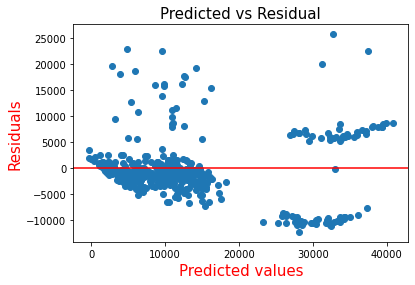

In [124]:
residual = y_test - y_test_pred_ridge
plt.scatter(y_test_pred_ridge,residual)
plt.axhline(0, color='r', linestyle='solid')
plt.xlabel('Predicted values', color = 'r', fontsize = 15)
plt.ylabel('Residuals', color = 'r', fontsize = 15)
plt.title('Predicted vs Residual', fontsize = 15)

###### The residuals are distributed normally around zero x-axis with few outliers.

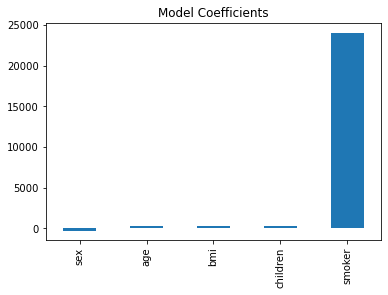

In [125]:
#checking the magnitude of coefficients
predictors = X.columns

coef = pd.Series(ridge.coef_ ,predictors).sort_values()

coef.plot(kind='bar', title='Model Coefficients')

###### We can see that coefficients of Smoker is much higher as compared to rest of the coefficients. Therefore the total insurance charges would be more driven by this feature. 
###### Ridge Regression shrinks coefficients to very low value close to zero, which certainly helps in feature selection. Here, in the above plot, the coefficients of variable 'sex' is reduced to very low value..

## Loading and saving the Ridge model

In [136]:
import pickle

pickle_out = open('insurance.pkl','wb')

# Save trained model to file
pickle.dump(ridge, pickle_out)

In [137]:
#Loading the trained model
loaded_model = pickle.load(open('insurance.pkl','rb'))
result = loaded_model.score(x_test, y_test_pred_ridge)
print(result)

1.0
